# Árboles de decisión

##  Cristina Gómez Alonso, Carlos Tessier

En este notebook utilizaremos como referencia el material de Aurelien Géron, sintetizado por Akranz, para explicar cómo entrenar, validar y realizar predicciones con **árboles de decisión** utilizando el dataset *Iris* y la librería **Scikit-learn**.

El dataset *Iris* es un conjunto clásico procedente del **UCI Machine Learning Repository**:
[https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)

A continuación revisaremos el algoritmo de entrenamiento **CART**, que es el que emplea `scikit-learn`, veremos cómo **regularizar** árboles para evitar sobreajuste y cómo utilizarlos también en **tareas de regresión**. Para finalizar, analizaremos varias **limitaciones** de los árboles de decisión y en qué situaciones no son la mejor opción.

## ¿Qué son los Árboles de Decisión?

Un árbol de decisión es una estructura que representa, de forma gráfica e interpretable, una serie de decisiones basadas en condiciones sobre las características del conjunto de datos. Es un algoritmo de **aprendizaje supervisado** muy usado, capaz de resolver tanto **clasificación** como **regresión**, y destaca por su simplicidad e interpretabilidad.

![arbol de decisión](https://miro.medium.com/v2/resize:fit:640/format:webp/1*BEH9fghOd9iYeGu8obk3PQ.png)

Principales características de los árboles de decisión:

* Clasifican los datos a partir de condiciones basadas en los atributos.
* Son una técnica de clasificación muy extendida en machine learning.
* Son modelos fáciles de interpretar, incluso por personas no expertas.
* También pueden utilizarse en regresión para estimar valores numéricos (ventas mensuales, precio de un vehículo, etc.).

Más información:

* [Wikipedia — Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Tutorial de Kaggle](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)







## Índice Gini

El índice Gini es la función de coste utilizada por defecto para evaluar la calidad de las divisiones en un árbol de decisión.

Una división en el conjunto de datos se define por un atributo de entrada y un umbral para dicho atributo, lo que permite separar los datos de entrenamiento en dos subconjuntos.

El valor del índice Gini mide el **grado de impureza** de los nodos resultantes, es decir, cuán mezcladas están las clases en cada subconjunto.
Una separación perfecta produce un índice Gini de **0**, mientras que la máxima impureza en un problema de **dos clases** se da cuando las clases están repartidas al 50 %, produciendo un valor de **0,5**.

---

## Entropy

`Entropy` es otra medida de impureza utilizada en árboles de decisión, basada en la **teoría de la información**. Mientras que el índice Gini mide la probabilidad de error al clasificar un elemento al azar, `entropy` mide la **incertidumbre** del sistema.

En la práctica:

* **Gini** es **más rápido de calcular** y por eso se usa por defecto en muchas implementaciones.
* **Entropy** es **más sensible a cambios en la distribución de las clases**.
* Ambos criterios suelen producir **árboles muy similares**.
* No existe un criterio universalmente mejor: la diferencia suele ser **pequeña y dependiente del problema**.



## 1. Importación de paquetes y dataset

Para entender los árboles de decisión, comencemos por construir uno y consultar sus predicciones:

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

## 2. División del dataset

In [3]:
X = iris.data [:, 2:]  # Use only petal length and petal width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

## 3. Creación del modelo de Árboles de decisión

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)

## 4. Entrenamiento

In [5]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## 5. Visualización del árbol de decisión

Podemos visualizar el árbol de decisiones utilizando el método export_graphiz() para exportar un archivo de representación gráfica y luego transformarlo a png:

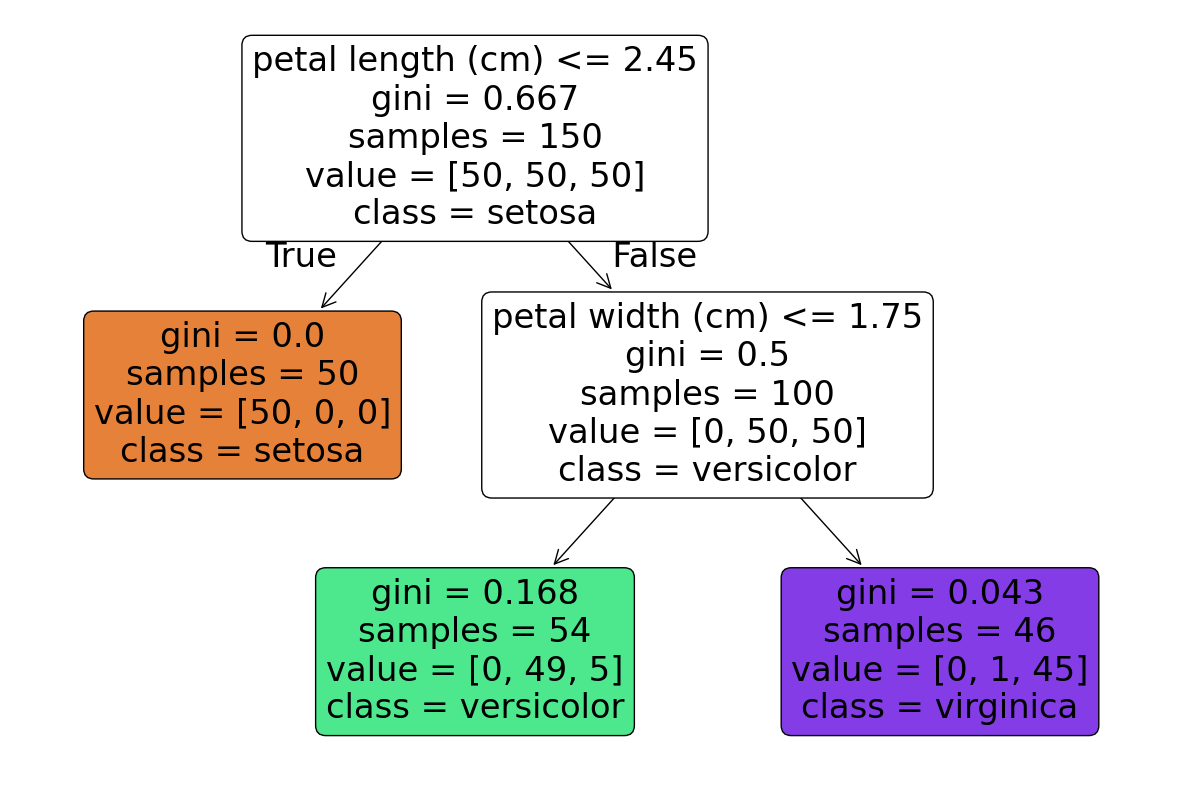

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size so the tree is legible
plt.figure(figsize=(15, 10))

# Plot the tree
plot_tree(tree_clf,
          filled=True,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True)

plt.show()



## 8. Realización de predicciones — Versión revisada para el alumnado

Para clasificar un nuevo dato con un árbol de decisión seguimos un proceso muy directo: empezamos en el nodo raíz (la parte superior del árbol) y vamos respondiendo las preguntas binarias que aparecen en cada nodo. En cada paso avanzamos hacia la rama que corresponde a la condición que se cumple. Cuando llegamos a una hoja, esa hoja indica la clase final que el modelo asigna al dato.

Una ventaja importante de los árboles de decisión es que **apenas necesitan preparación de datos**: no es necesario escalar ni normalizar las variables, ya que las divisiones se basan en valores umbral y no en distancias.

Cada nodo del árbol incluye varios atributos que ayudan a interpretar cómo está tomando decisiones:

* **samples (muestras)**: cuántas instancias del conjunto de entrenamiento llegaron hasta ese nodo.
* **value (valor)**: cuántas muestras hay de cada clase dentro del nodo.
* **gini**: medida de impureza. Si un nodo tiene solo una clase, su impureza es 0 (es un nodo “puro”).

El índice Gini del nodo ( i ) se calcula mediante:

$
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$]$

donde $ p_{i,k} $ es la proporción de muestras de la clase $ k $ dentro del nodo. En nuestro caso, $ k \in {1,2,3} $.

En `scikit-learn`, los árboles se entrenan con el algoritmo **CART**, que siempre genera árboles binarios: cada nodo de decisión tiene dos ramas. Otros algoritmos clásicos, como **ID3**, sí pueden crear nodos con más de dos hijos.

En la figura siguiente se aprecia cómo un árbol va creando divisiones rectangulares en el espacio de características. Este comportamiento hace que los límites de decisión tengan forma de líneas rectas y zonas rectangulares:

![Boundaries](https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_iris_dtc_001.png)

En general, los árboles de decisión:

* son **intuitivos**
* sus predicciones se pueden **interpretar fácilmente**
* se consideran modelos de **“caja blanca”**

En contraste, métodos como **Random Forest** o las **redes neuronales profundas** se consideran modelos de **“caja negra”**, ya que resulta mucho más difícil interpretar cómo llegan a sus decisiones internas.





### 8.1. Estimando las probabilidades de pertenencia a cada clase

Un árbol de decisión también permite **estimar la probabilidad** de que una instancia pertenezca a cada clase. Para ello, toma la **hoja** en la que cae el dato y calcula la probabilidad como:

> proporción de muestras de esa clase
> entre el total de muestras presentes en la hoja.

En `scikit-learn`, estas probabilidades pueden consultarse con el método `predict_proba()`.

Por ejemplo, si introducimos una flor con **longitud de pétalo = 5** y **ancho de pétalo = 1.5**, el árbol puede devolver algo como:

* Clase 0 → 0.00
* Clase 1 → 0.90
* Clase 2 → 0.09

Lo que significa que, según el modelo, la clase más probable es la **clase 1**.



In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])


**Nota:** obtendremos la misma probabilidad para cualquier punto que caiga en la **misma hoja** del árbol. Aunque el nuevo dato esté más cerca o más lejos de los límites de decisión (*decision boundaries*), la probabilidad no cambia, porque todas las muestras dentro de una misma hoja comparten la misma distribución de clases.




## Regularización y sobreajuste en Árboles de Decisión

### ¿Por qué los árboles sobreajustan?

Los árboles de decisión tienden a **crecer demasiado** si no se les pone límite. Un árbol sin restricciones seguirá dividiéndose hasta separar completamente las muestras del conjunto de entrenamiento. Esto suele producir:

* **Exactitud perfecta en entrenamiento** (accuracy = 1.0)
* **Peor rendimiento en test**, porque el árbol aprende ruido y particularidades del dataset, no patrones generales.

Ejemplo simple con *Iris*:

```python
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))
```

Salida típica:

```
Train accuracy: 1.0
Test accuracy: 0.88
```

La diferencia entre ambos valores indica **overfitting**.

---

## ¿Cómo evitar el sobreajuste?

La solución es **controlar la complejidad del árbol** mediante **hiperparámetros de regularización**.

### Ejemplo visual: árbol sin podar vs. árbol podado

En los árboles de decisión, **podar (pruning)** consiste en eliminar ramas que aportan poca información o que no mejoran la capacidad predictiva del modelo. El objetivo es obtener un árbol **más simple**, **más generalizable** y con **menor riesgo de sobreajuste**.

![ejemplo pruning](https://miro.medium.com/v2/resize:fit:720/format:webp/1*WQfd2tteLlic7-pu_FxjfQ.png)

Este ejemplo muestra claramente la diferencia entre ambos modelos:

* **Árbol sin podar:**

  * Tiene más nodos y más profundidad.
  * Captura el ruido del conjunto de entrenamiento.
  * Presenta mayor varianza y tiende a sobreajustar.

* **Árbol podado:**

  * Es más pequeño y fácil de interpretar.
  * Elimina ramas poco relevantes.
  * Generaliza mejor a datos nuevos.

Los **hiperparámetros de regularización** más importantes son:

---

### 1. `max_depth`

Límite máximo de profundidad del árbol.

* Árbol más profundo → más complejo → más riesgo de overfitting.
* Árbol menos profundo → más simple → mejor generalización.

Ejemplo:

```python
clf = DecisionTreeClassifier(max_depth=5)
```

---

### 2. `min_samples_leaf`

Número mínimo de muestras que debe haber en una hoja.

* Obliga al árbol a no crear hojas con muy pocos datos.
* Reduce el ruido y suaviza las predicciones.

```python
clf = DecisionTreeClassifier(min_samples_leaf=10)
```

---

### 3. `min_samples_split`

Número mínimo de muestras necesarias para dividir un nodo.

* Evita divisiones innecesarias cuando hay muy pocas muestras disponibles.

```python
clf = DecisionTreeClassifier(min_samples_split=20)
```

---






## Búsqueda automática de mejores hiperparámetros

Podemos usar `GridSearchCV` para probar diferentes combinaciones y elegir las que mejor funcionen:

``` python
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
```

Esto permite al alumnado ver de forma práctica cómo mejorar un árbol sin adivinar los valores "a ojo".

---

## Post-pruning (poda tras el entrenamiento)

Además de limitar el crecimiento del árbol desde el principio (pre-pruning), también existe la **poda posterior**, que elimina ramas poco útiles una vez entrenado el árbol completo.

En `scikit-learn` se implementa con el parámetro:

* **`ccp_alpha`** → controla cuánto se poda el árbol.

Un valor más alto = árbol más pequeño.

Ejemplo final con un `ccp_alpha` ya elegido:

``` python

clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)
```

##  **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para los mismos datasets utilizados en la práctica de Regresión Logística**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **árbol de decisión** sobre un dataset ya preprocesado.
* Comparar su rendimiento frente al modelo de **regresión logística** visto en el notebook.
* Identificar posibles casos de **sobreajuste** y aplicar **regularización**.
* Interpretar las **reglas de decisión** y la **importancia de variables**.

El alumnado debe trabajar con **los mismos datasets** utilizados en el notebook:

* **Hipotiroidismo (hypothyroid.csv)**
* **Titanic (titanic_train.csv)**

### **PARTE 1 – Árbol de Decisión aplicado al dataset de Hipotiroidismo**

<div style="background-color:green;color:white">

<br>

Implementar el mismo flujo del notebook (carga → limpieza → transformación → división)

<br>

#### 1. Importación de paquetes y dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'


<div style="background-color:green;color:white">

A partir de la cadena con los nombres de las variables almacenada en la variable names, convierte esa cadena en una lista de nombres de columnas separando por espacios de forma que names pase a ser una lista de strings con cada nombre de variable.


<br>

In [11]:
names = names.split(' ')

<div style="background-color:green;color:white">

Carga el fichero hypothyroid.csv en un DataFrame de pandas llamado df
* utilizando la lista names como nombres de columnas
* indicando que no hay columna de índice específica
* que el carácter '?' debe tratarse como valor faltante (NaN)

<br>

In [12]:
df=pd.read_csv('data/hypothyroid.csv', names=names, index_col=False, na_values=['?'])

In [13]:
# mostrar primeras filas del dataset
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [14]:
# mostrar dimensiones del dataset
df.shape

(3163, 26)

#### 2. Preprocessing


##### 2.1. Borrado de columnas innecesarias

<div style="background-color:green;color:white">


Borraremos todas las features que tienen en su nombre la palabra measured o querey ya que son redundantes.

<br>

In [15]:
 # Crea una lista vacía donde guardaremos nombres de columnas a eliminar
col_drop=[]
# Recorre todos los nombres de columnas del DataFrame
    # Si el nombre de la columna contiene 'measured' o 'query'
        # Añade ese nombre de columna a la lista con las columnas a eliminar
for c in df.columns:
  if 'measured' in c or "query" in c:
    col_drop.append(c)

<div style="background-color:green;color:white">

Añadir la característica TBG para eliminar

<br>

In [16]:
col_drop.append('TBG')

In [17]:
col_drop

['query_on_thyroxine',
 'query_hypothyroid',
 'query_hyperthyroid',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'TBG']

<div style="background-color:green;color:white">

Eliminar del dataframe todas las características (columnas) guardadas en la lista, modificando el DataFrame directamente sin devolver una copia.

<br>

In [18]:
df.drop(col_drop, axis=1, inplace=True)

In [19]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


<div style="background-color:green;color:white">

Consultamos los valores estadísticos básicos de cada columna.

<br>

In [20]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


<div style="background-color:green;color:white">

mostrarlo de nuevo con la función que permite transponer la matriz resultado y ayuda a la comprensión de dichos valores.

<br>

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00



##### 2.2. Tratamiento de missing values

<div style="background-color:green;color:white">

Utiliza la función adecuada de pandas para localizar los valores faltantes y, a continuación, calcula cuántos valores faltantes hay en cada columna.

<br>

In [22]:
df.isna().sum()

,0
response,0
age,446
sex,73
on_thyroxine,0
antithyroid_medication,0
thyroid_surgery,0
pregnant,0
sick,0
tumor,0
lithium,0


<div style="background-color:green;color:white">


Borrar las filas con valores missing ya que desconocemos de conocimiento experto en el área que nos ayude a estimar correctamente dichos valores desconocidos.

<br>

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape
df['response'].unique()

array(['hypothyroid', 'negative'], dtype=object)

##### 2.3. Transformación de datos categóricos manualmente

La columna **response** contiene los valores 'hypothyroid' para indicar que el paciente sufre hipertiroidismo y 'negative' para indicar que no.

Podríamos utilizar ``get_dummies`` de pandas:

``df_encoded = pd.get_dummies(df, columns=['response'], prefix='clase')``

Pero en este caso vamos a sustituirlos manualmente los valores numéricos (hypothyroid=1 y negative=0).

<div style="background-color:green;color:white">


Define una función llamada class_convert(response) que reciba como parámetro una cadena de texto y devuelva el valor entero 1 si response es igual a 'hypothyroid', y 0 en cualquier otro caso.

<br>

In [25]:
def class_convert(response):
  if response == 'hypothyroid':
    return 1
  else:
    return 0


<div style="background-color:green;color:white">


Aplica la función class_convert a todos los valores de la columna response del DataFrame df para transformar sus valores en 0 o 1, y guarda el resultado de nuevo en la propia columna df['response'].

<br>

In [26]:
df['response']=df['response'].apply(class_convert)

In [27]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [28]:
df.columns

Index(['response', 'age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

#### 3. Visual EDA

##### 3.1. Diagrama de cajas

Un diagrama de caja (en inglés boxplot) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana(el valor que ocupa la posición central de un conjunto de observaciones ordenadas) y los cuartiles de los datos, y también pueden representarse sus valores atípicos (o outlayers).
![Explicacion boxplot](./data/box_plot.png)

<div style="background-color:green;color:white">

Representa mediante diagramas de caja la distribución de cada una de las variables age, TSH, T3, TT4, T4U y FTI en función de la variable de respuesta response, generando y mostrando un boxplot separado para cada una de ellas.

<br>

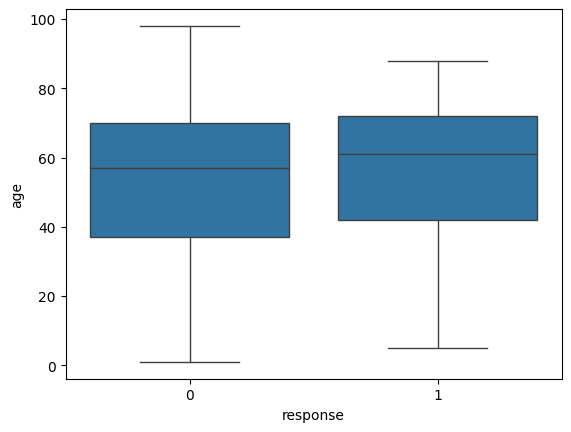

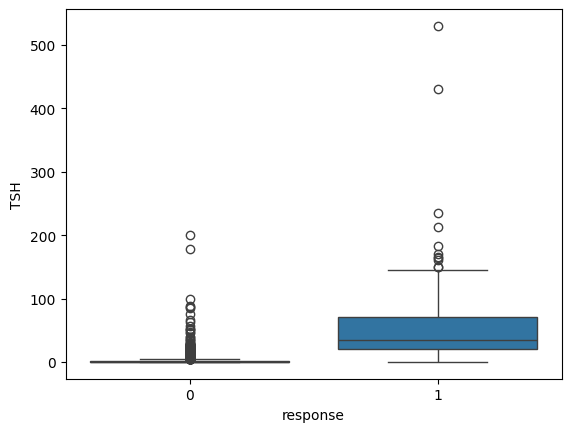

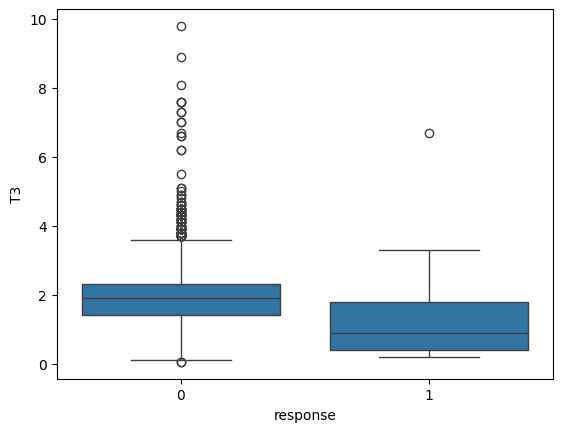

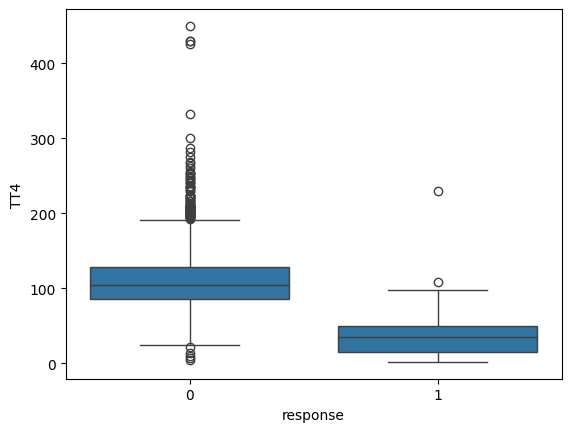

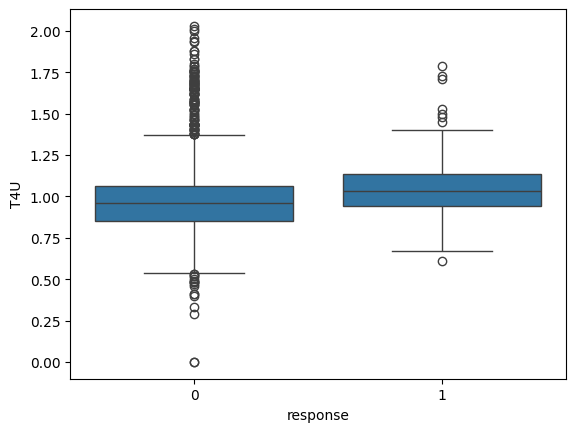

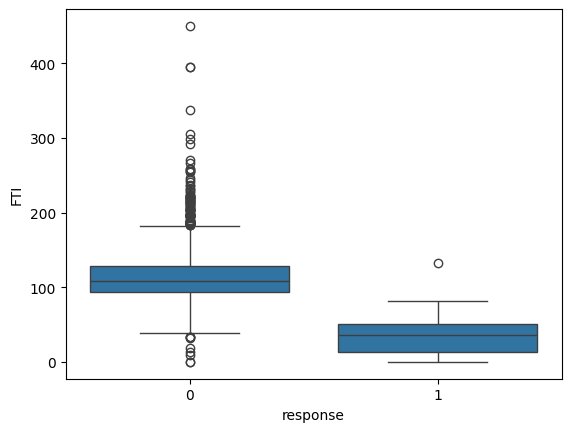

In [29]:
col_boxplot=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in col_boxplot:
  sns.boxplot(x='response',y=col,data=df)
  plt.show()

In [30]:
# --- Conteo de clases ---
conteo_clases = df["response"].value_counts()
print("Distribución de clases:")
print(conteo_clases)


Distribución de clases:
response
0    1878
1     122
Name: count, dtype: int64


<div style="background-color:green;color:white">

Observa los boxplots de las variables age, TSH, T3, TT4, T4U y FTI.

A partir de ellos:

1. Identifica en qué variables aparecen valores atípicos (outliers) y señala cuáles parecen más extremos.

2. Comenta si esos outliers podrían ser valores reales o errores, basándote únicamente en lo que ves en el gráfico.

3. Explica qué acciones considerarías antes de analizar o modelar estos datos (por ejemplo: mantenerlos, transformarlos o tratarlos de alguna forma).

<br>

###### **Explicación del boxplot**

En los boxplot podemos observar:

- Hay muchos outliers en las columnas ("TSH","T3","TT4","FTI") por encima del valor máximo. Sugiere una alta variabilidad en estas características y posibles registros extremos.

- Hay muchos outliers en la columna ("T4U") tanto por encima del valor máximo como por debajo del valor mínimo. Podría indicar errores de medición o valores imposibles (ej. registros en 0).

- En varias columnas ("TSH","T3","TT4","T4U","FTI") aparecen valores en 0, lo que sugiere que podrían ser datos faltantes codificados como cero. Conviene revisar estos casos atípicos antes de modelar.

Hay más proporción de clase 0 (response=0) que de clase 1 (response=1). El desbalance puede afectar a que el modelo aprenda mejor a clasificar la clase mayoritaria (0) y peor a detectar la minoritaria (1). Deberíamos considerar reducir la clase mayoritaria o aumentar la minoritaria para mejorar el rendimiento del modelo.


<div style="background-color:green;color:white">

Observa los boxplots de las variables que muestran distribuciones muy asimétricas y con valores extremos.

1. **Aplica una transformación logarítmica** a cada una de ellas *log1p*.
2. **Vuelve a representar los boxplots** utilizando los valores transformados.
3. **Compara los gráficos originales y transformados**, explicando cómo cambia la forma de la distribución (asimetría, rango, presencia de outliers).
4. **Indica por qué la transformación logarítmica puede ser útil** en el análisis o en la preparación de un modelo predictivo.

<br>

In [31]:
# Transformación logarítmica
df_log = df.copy()
for col in col_boxplot:
  df_log[col] = np.log1p(df_log[col])

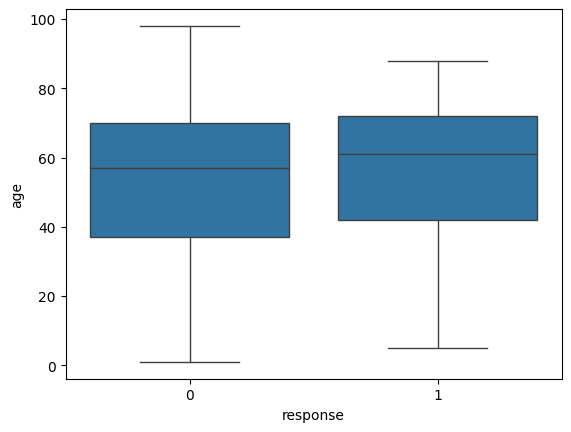

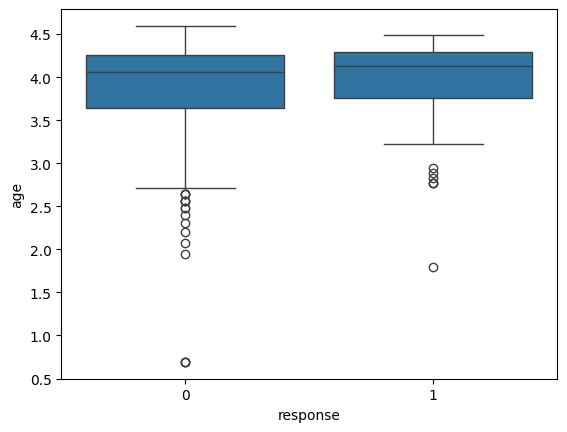

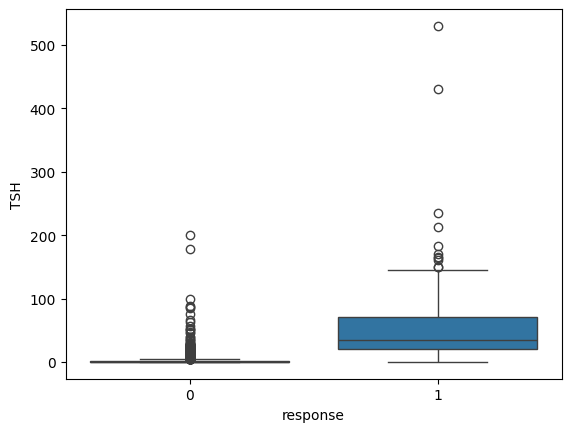

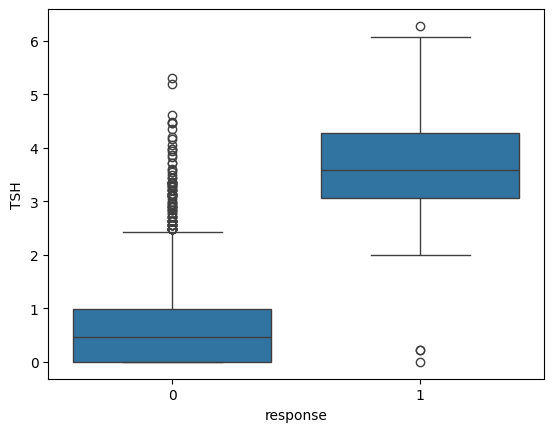

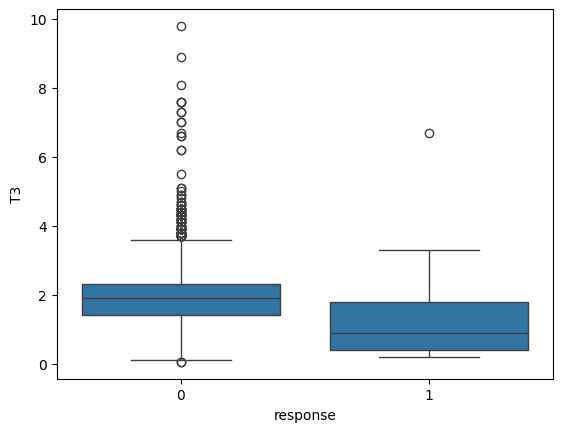

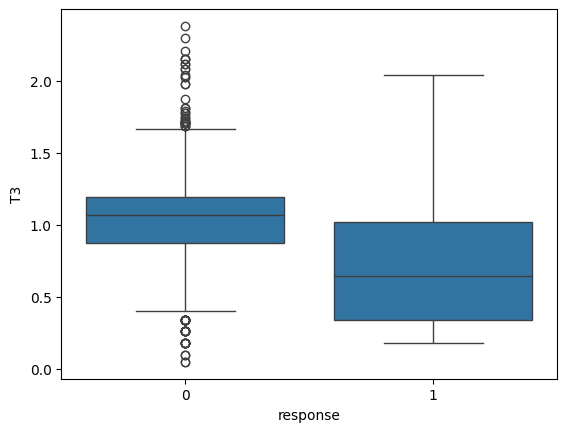

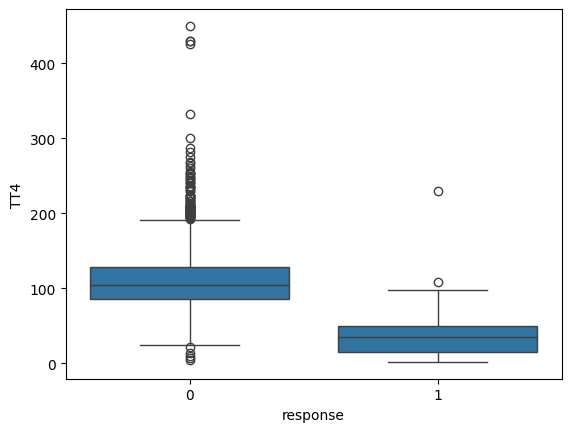

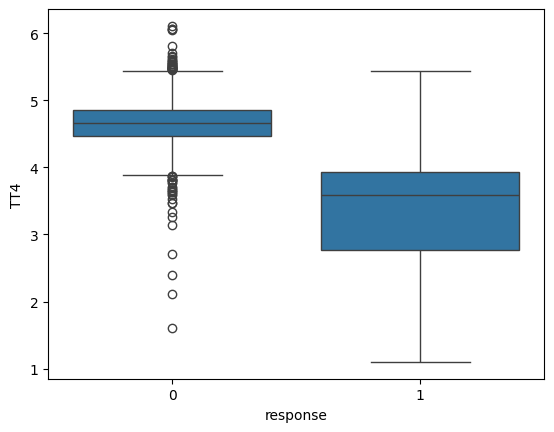

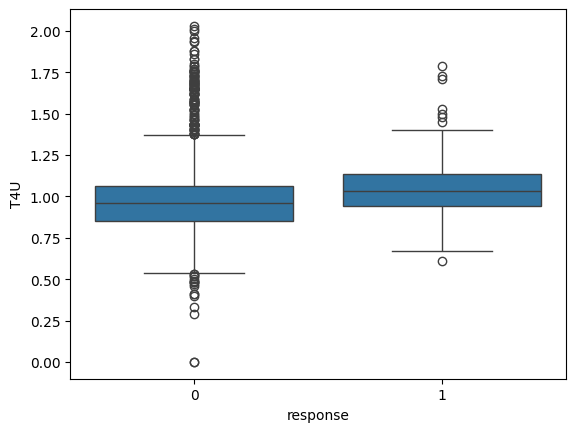

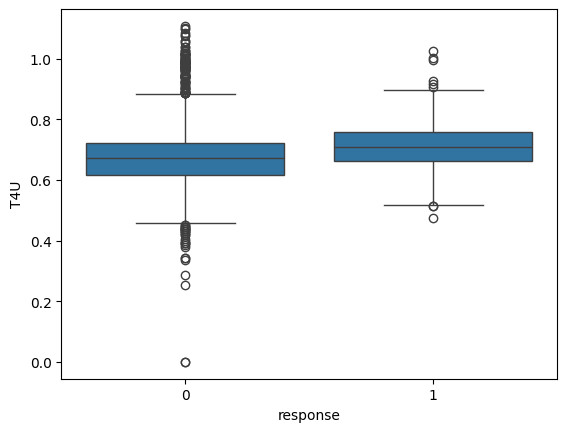

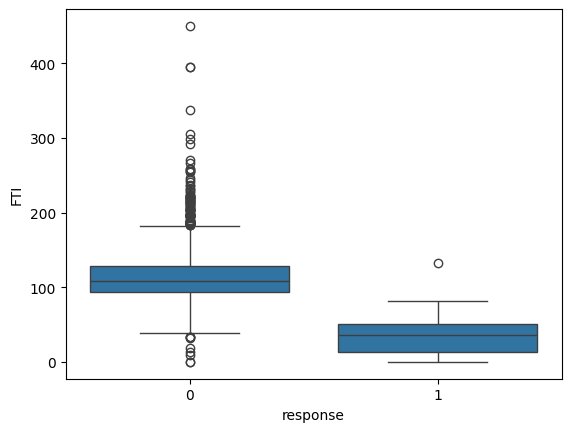

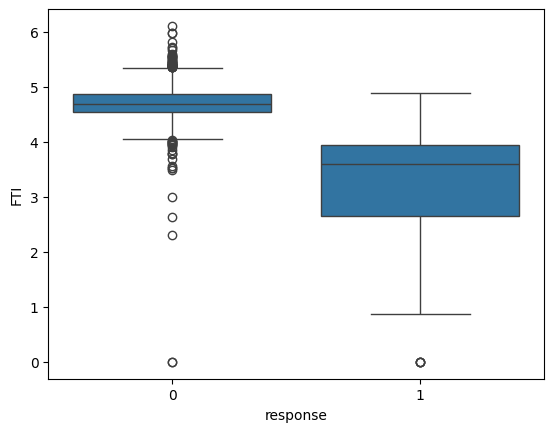

In [32]:
# Comparación de graficos originales y tranformados
for col in col_boxplot:
  sns.boxplot(x='response',y=col,data=df)
  plt.show()
  sns.boxplot(x='response',y=np.log1p(df[col]),data=df)
  plt.show()

##### 3. **Comparación de los boxplots originales vs transformados**

- Asimetría: pasa de muy marcada (colas largas) a más equilibrada.
- Rango: disminuye, lo que facilita comparar variables en una misma escala.
- Outliers: se atenúan visualmente, aunque no desaparecen del todo.
- Interpretación: los valores extremos dejan de dominar la visualización y se integran mejor en el análisis.

---------------------------------------------------------------------------
##### 4. **Utilidad de la transformación logarítmica en modelos predictivos**

- Reduce asimetría: comprime valores grandes y hace la distribución más equilibrada.
- Atenúa outliers: los extremos dejan de dominar el análisis
- Homogeneiza escalas: facilita comparar variables muy diferentes.
- Mejora modelos: aporta estabilidad numérica y ayuda a algoritmos sensibles a la escala.

##### 3.2. Análisis de correlaciones entre variables independendientes

<div style="background-color:green;color:white">

Genera un pairplot utilizando todas las variables numéricas del conjunto de datos

<br>

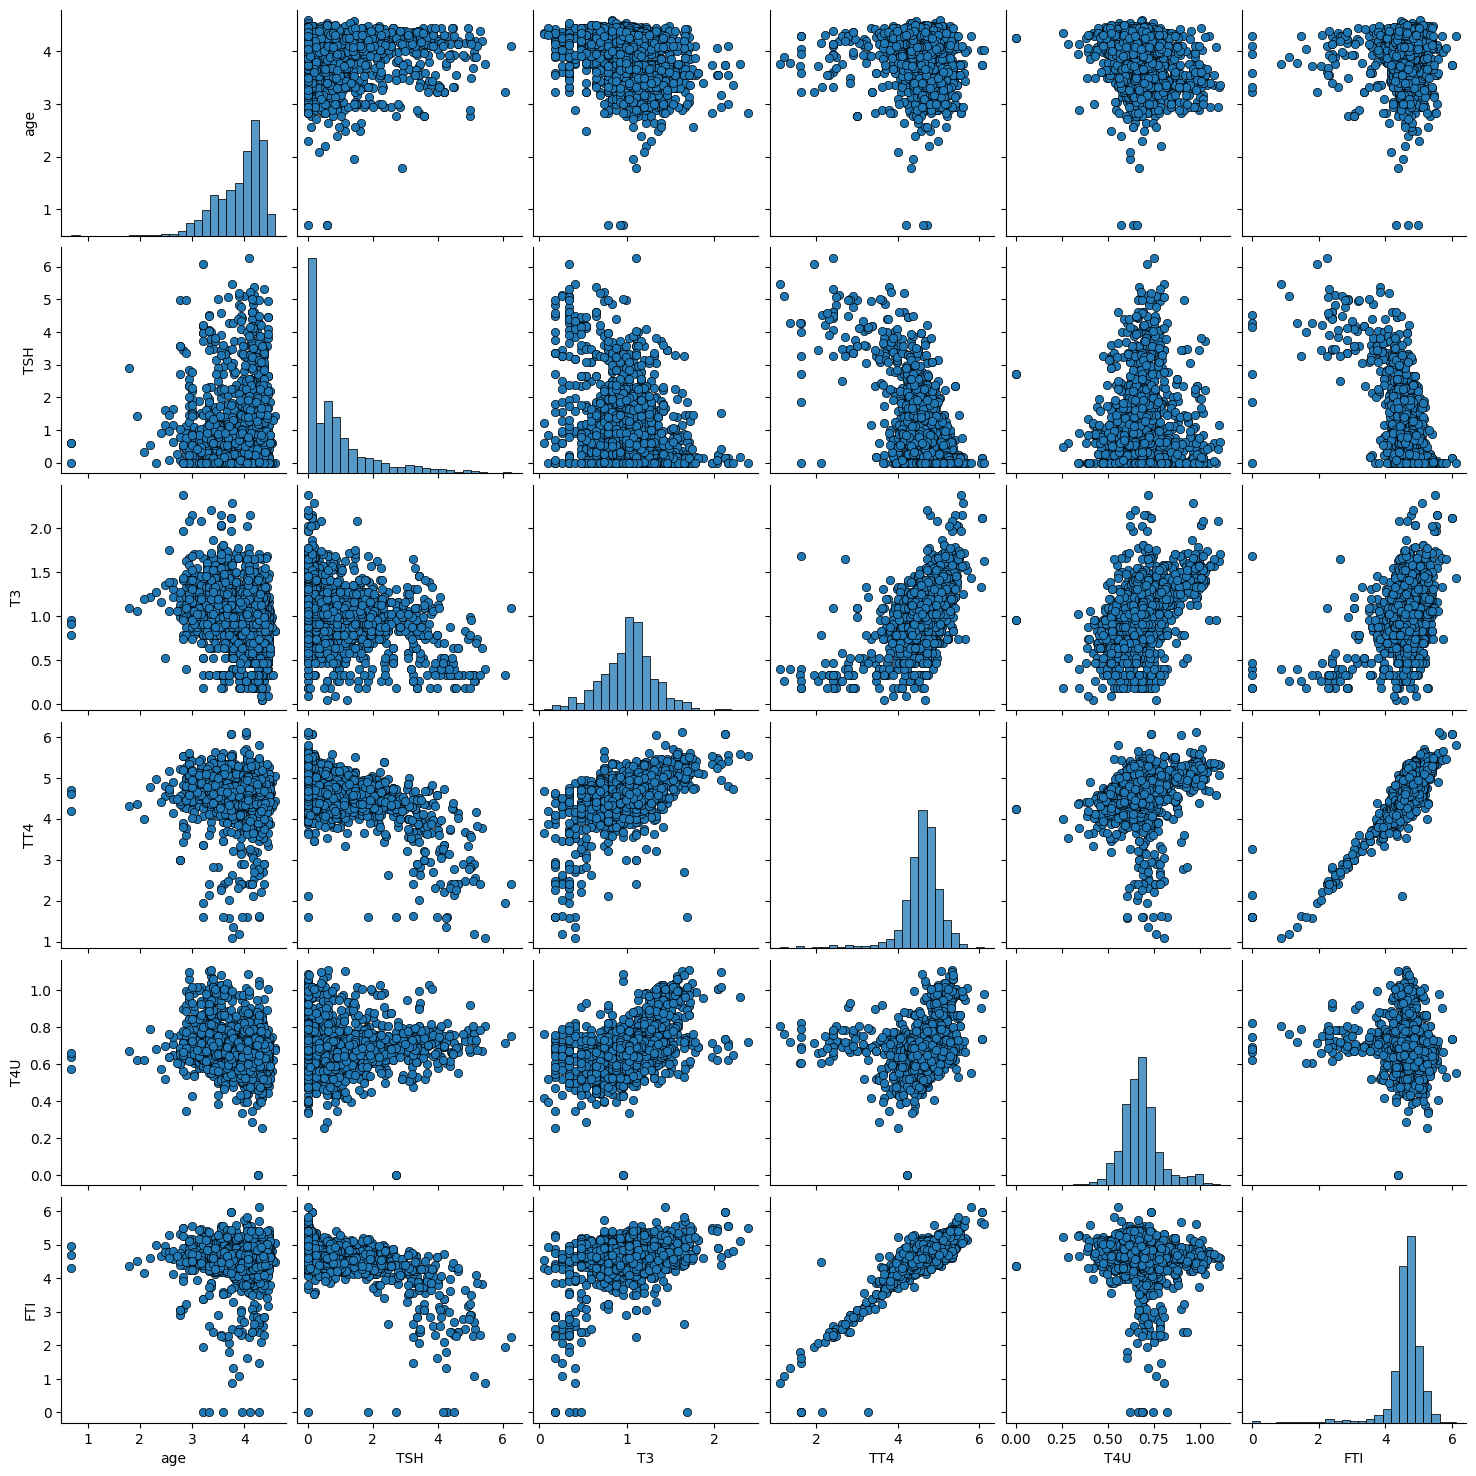

In [33]:
sns.pairplot(data=df_log[df_log.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()


<div style="background-color:green;color:white">

Observa el *pairplot* generado con las variables del dataset.

1. **Describe la forma de las distribuciones** que aparecen en la diagonal del gráfico:

   * ¿Qué variables están más concentradas?
   * ¿Cuáles muestran asimetría o valores extremos?

2. **Analiza las relaciones entre pares de variables** en los diagramas de dispersión:

   * ¿Hay alguna relación clara entre dos variables?
   * ¿O la mayoría de pares no muestran patrón?

Escribe un breve resumen con tus observaciones.

<br>

###### **Explicación del pairplot**

1. **Forma de las distribuciones**
  - Variables mas concentradas:
    - T3 y T4U muestran distribuciones más compactas, con la mayoría de los valores agrupados en rangos estrechos.
  - Variables con asimetría o valores extremos:
    - TSH, TT4 y FTI presentan distribuciones muy sesgadas hacia la derecha, con colas largas y múltiples outliers.

2. **Relaciones entre pares de variables**
  - Relaciones claras:
    - TT4 y FTI muestran una correlación positiva evidente, ya que ambas están relacionadas con la función tiroidea.

    - T3 y TT4 podrían tener una relación moderada, aunque con dispersión.

  - Sin patrón aparente:

    - TSH no parece tener una relación lineal clara con las demás variables.

    - T4U muestra dispersión amplia sin tendencia definida.

##### 3.3. Transformación de datos categóricos con get_dummies

<div style="background-color:green;color:white">

Selecciona las variables categóricas del dataset y conviértelas a variables numéricas usando **`pd.get_dummies()`**.

<br>


In [34]:
# Filtrar solo columnas categóricas
cols_cat = df_log.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", cols_cat)

Variables categóricas: Index(['sex', 'on_thyroxine', 'antithyroid_medication', 'thyroid_surgery',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')


In [35]:
df_dummies = pd.get_dummies(df_log,columns=cols_cat,drop_first=True)

##### 3.4. Mapa de calor

<div style="background-color:green;color:white">

Crear un mapa d calor para ver solo las correlaciones con response

<br>


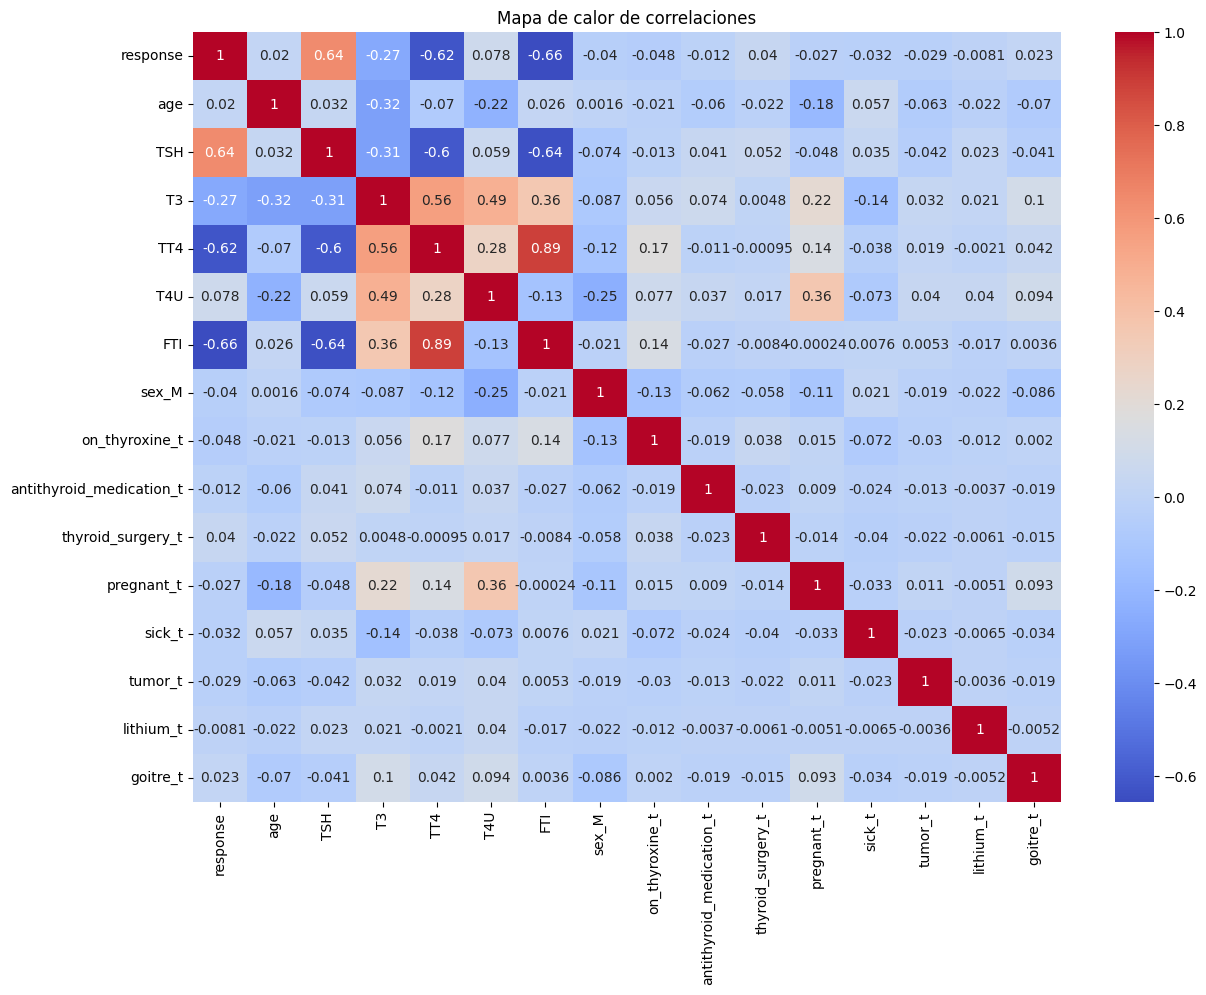

In [36]:
corr = df_dummies.corr()
# Crear mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

#### 4. División del dataset

<div style="background-color:green;color:white">


Separaremos el conjunto de datos en dos partes:

* **X**: incluirá todas las columnas del dataset **excepto la variable *response***.
  Estas serán las **variables predictoras** o características que usará el modelo.

* **y**: contendrá únicamente la columna **response**, que es la **variable objetivo** que queremos predecir.

Una vez creada esta separación, podrás utilizar X e y para entrenar y evaluar los modelos de clasificación.

<br>


In [37]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('response', axis=1)
y = df_dummies['response'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

<div style="background-color:green;color:white">


Imprimir la forma de X_train y de X_test

<br>

In [38]:
print("Filas X_train:", X_train.shape[0], "Columnas X_train:", X_train.shape[1])
print("Filas X_test:", X_test.shape[0], "Columnas X_test:", X_test.shape[1])


Filas X_train: 1400 Columnas X_train: 15
Filas X_test: 600 Columnas X_test: 15


In [39]:
print(y_train.dtype)
print(y_train.unique()[:10])  # primeros valores únicos


int64
[0 1]


---

<div style="background-color:green;color:white">

#### **1. Crear el modelo de árbol básico**

<br>

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Crear y entrenar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

In [41]:
# Evaluación de rendimiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98
Recall: 0.8387096774193549
F1-score: 0.8125
Matriz de confusión:
 [[562   7]
 [  5  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.79      0.84      0.81        31

    accuracy                           0.98       600
   macro avg       0.89      0.91      0.90       600
weighted avg       0.98      0.98      0.98       600



#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

Comprobar el score de train y test:

<br>

In [42]:
# Comprobar el accuracy de train y test
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.98


<div style="background-color:green;color:white">

<br>

¿Tu modelo tiene accuracy perfecto en entrenamiento pero baja en test?

<br>

Si, lo que significa que tiene sobreajuste debido al ruido

#### **4. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar *GridSearchCV* para probar diferentes combinaciones y elegir las que mejor funcionen


<br>

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [44]:
model_reg = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)
model_reg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)


<div style="background-color:green;color:white">

<br>

Comparar rendimiento entre:

* Árbol sin regularización
* Árbol regularizado


<br>

In [45]:
# Recrear el modelo sin
model_unreg = DecisionTreeClassifier(random_state=42)
model_unreg.fit(X_train, y_train)

# Comprobar rendimiento del árbol sin regularización
print("Train accuracy (sin regularización):", model_unreg.score(X_train, y_train))
print("Test accuracy (sin regularización):", model_unreg.score(X_test, y_test))

# Comprobar rendimiento del árbol regularizado
print("Train accuracy (regularizado):", round(model_reg.score(X_train, y_train),4))
print("Test accuracy (regularizado):", round(model_reg.score(X_test, y_test),4))

Train accuracy (sin regularización): 1.0
Test accuracy (sin regularización): 0.98
Train accuracy (regularizado): 0.9886
Test accuracy (regularizado): 0.9883


#### **5. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable aparece como la más influyente para detectar hipotiroidismo?
2. ¿Coincide con lo observado con la regresión logística (coeficientes)?

<br>

In [46]:
# Importancia de las variables del dataset
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": model_unreg.feature_importances_
})

# Ordenar por importancia descendente
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

print(coeficientes)

                    Variable  Importancia
5                        FTI     0.729037
1                        TSH     0.165645
7             on_thyroxine_t     0.040067
0                        age     0.030226
2                         T3     0.016507
8   antithyroid_medication_t     0.012641
3                        TT4     0.005876
6                      sex_M     0.000000
4                        T4U     0.000000
9          thyroid_surgery_t     0.000000
10                pregnant_t     0.000000
11                    sick_t     0.000000
12                   tumor_t     0.000000
13                 lithium_t     0.000000
14                  goitre_t     0.000000


1. La variable mas influyente es FTI
2. Comparación:
  - El top 3 del arbol de decisión:
  
Árbol de Decisión
| Ranking | Variable         | Importancia |
|---------|------------------|-------------|
| 1      | FTI              | 0.729037    |
| 2      | TSH              | 0.165645    |
| 3      | on_thyroxine_t   | 0.040067    |

Regresión Logística

| Ranking | Variable | Coeficiente |
|---------|----------|-------------|
| 1      | TSH      | 1.729812    |
| 2      | T4U      | 1.197560    |
| 3      | FTI      | 0.693274    |

### **PARTE 2 – Árbol de Decisión aplicado al dataset del Titanic**

Usando exactamente el mismo preprocesamiento del notebook de regresión logística, se pide repetir el análisis:





<div style="background-color:green;color:white">

#### **1. Carga del dataset**

1. Carga el fichero titanic_train.csv.

<br>


In [88]:
df=pd.read_csv('data/titanic_train.csv')

<div style="background-color:green;color:white">

2. Muestra:

   * las primeras 5 filas,
   * el número de filas y columnas
   * el tipo de datos de las columnas
   * el número de valores nulos por columna.

¿Qué columnas contienen valores nulos?

<br>

In [89]:
# Display the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# Display the shape of the DataFrame
df.shape

(891, 12)

In [91]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [92]:
# Check for missing values in each column
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **2. Visual EDA (Análisis Exploratorio)**

<div style="background-color:green;color:white">



##### **2.1. Supervivencia por sexo**

Mostrar un gráfico con la tasa de supervivencia por sexo

1. ¿Qué sexo presenta mayor supervivencia?
2. ¿La diferencia parece grande o pequeña?

<br>

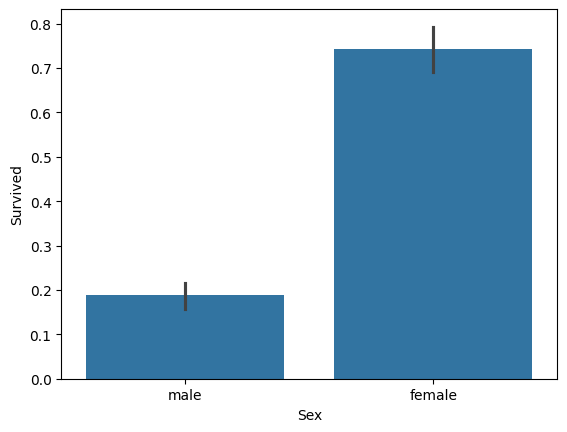

In [93]:
# Gráfico con la tasa de supervivencia por sexo
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

#### Tasa de supervivencia por sexo
1. El sexo femenino presenta mayor tasa de supervivencia ante el masculino
2. La diferencia parece bastante grande de unos 0,75 a 0,2


<div style="background-color:green;color:white">

#### **2.1. Supervivencia por clase (Pclass)**

Mostrar un gráfico con la tasa de supervivencia por clase

1. ¿Los pasajeros de primera clase sobrevivieron más?
2. ¿Qué clase tiene la menor supervivencia?

<br>

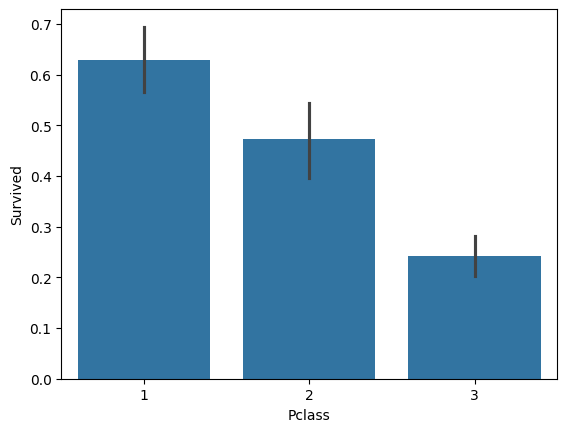

In [94]:
# Gráfico con la tasa de supervivencia por clase
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

#### Tasa de supervivencia por clase
1. La primera clase tiene mas tasa de supervivencia
2. La clase 3 tiene menos supervivencia.

Hay mas tasa de supervivencia entre mejor clase tienen los pasajeros.

<div style="background-color:green;color:white">

#### **2.3. Histograma de edades**

1. ¿Hay más adultos jóvenes que mayores?
2. ¿La distribución es aproximadamente normal o está sesgada?

<br>

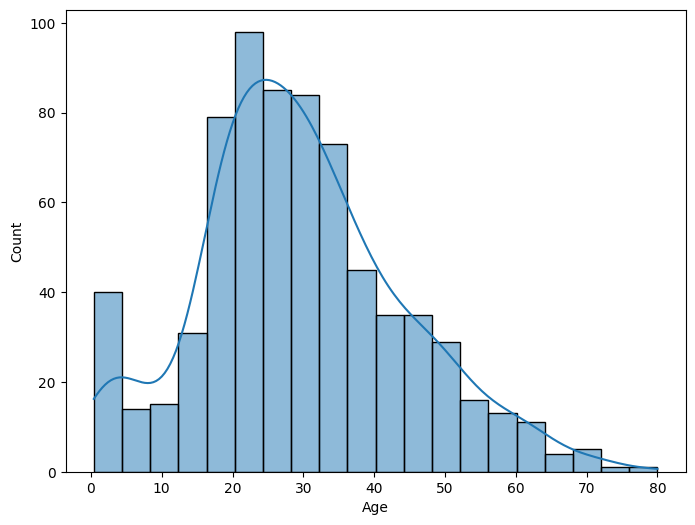

In [95]:
# Histograma de edades
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Age',kde=True)
plt.show()

#### Histograma de edades
1. Hay mas adultos jovenes(pico en los 25 años) que personas mayores
2. La distribución esta sesgada a la derecha

<div style="background-color:green;color:white">

#### **2.4. Relación clase–edad**

1. ¿Los pasajeros de 1ª clase son más mayores de media?
2. ¿Qué clase tiene más variabilidad de edad?

<br>

In [96]:
pd.pivot_table(df, values='Age', index='Pclass', aggfunc=['mean','median','min','max'])


,mean,median,min,max
,Age,Age,Age,Age
Pclass,,,,
1,38.233441,37.0,0.92,80.0
2,29.877630,29.0,0.67,70.0
3,25.140620,24.0,0.42,74.0


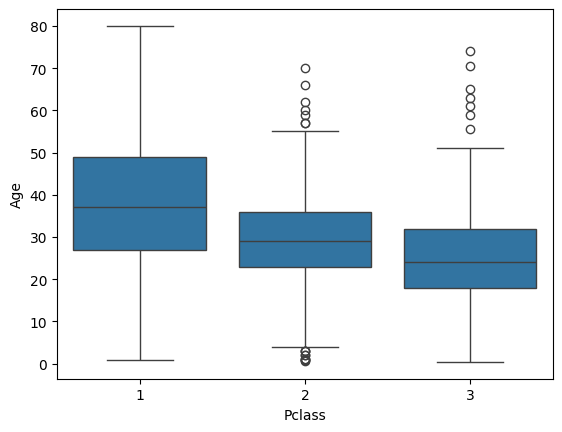

In [97]:
# Relación clase-edad
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

#### Relación de clase-edad
1. Los pasajeros de clase 1 de media son mas mayores que en las otras clases

3. La clase 3 tiene mas variabilidad de edad

<div style="background-color:green;color:white">


# **3. Preprocesamiento**
--

### **3.1. Sustituir valores faltantes**

¿Por qué podría ser problemático usar la media como relleno?

<br>


- Perdida de variabilidad
- Distorsión de la distribución


In [98]:
# Sustituir los valores faltantes por la mediana

mediana_age = df['Age'].median()

df['Age'] = df['Age'].fillna(mediana_age)

# Verificar que ya no hay valores faltantes
print(df['Age'].isnull().sum())

0


<div style="background-color:green;color:white">

### **3.2. Suprimir columnas innecesarias**

1. ¿Por qué “Cabin” suele considerarse una mala columna para este modelo?

<br>

Se puede considerar una mala columna para el modelo porque faltan mas de la mitad de los datos de la columna

In [99]:
# Eliminar la columna Cabin
df.drop(columns=['Cabin'], inplace=True)

<div style="background-color:green;color:white">


### **3.3. Crear variables dummy**

1. ¿Por qué usamos *drop_first=True*?
2. ¿Qué problema evitamos?

<br>

In [100]:
# Filtrar solo columnas categóricas
cols_cat = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", cols_cat)

Variables categóricas: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [101]:
cols_dum =df[['Sex', 'Embarked', 'Ticket']]

In [102]:
df_dummies = pd.get_dummies(df,columns=cols_dum.columns.tolist(),drop_first=True)

<div style="background-color:green;color:white">


# **4. Entrenamiento**

### **4.1 Separación de variables (X, y)**

Separar las variables independientes (X) y variable objetivo (y)




<br>

In [103]:
X = df_dummies[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df_dummies['Survived']

<div style="background-color:green;color:white">


### **4.2 División del conjunto de datos en entrenamiento y prueba**

1. ¿Por qué dividimos en train/test?

Evitamos que memorice todos los datos y haya sobreajuste

2. ¿Qué hace *random_state=42*?

Garantizar que cada vez que se ejecute el codigo la division sea exactamente la misma
<br>

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">


### **4.3 Escalado de datos / Normalización**

<br>

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<div style="background-color:green;color:white">

### **1. Crear el modelo de árbol básico**

<br>

In [135]:
from sklearn.tree import DecisionTreeRegressor

model_unreg = DecisionTreeRegressor(random_state=42)
model_unreg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

In [137]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
# Realizar predicciones sobre el conjunto de test
y_pred_unreg = model_unreg.predict(X_test_scaled)

# Calcular métricas

print("Reporte de clasificación:\n", classification_report(y_test, y_pred_unreg))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_unreg))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       105
           1       0.66      0.68      0.67        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179

Matriz de confusión:
 [[79 26]
 [24 50]]


<div style="background-color:green;color:white">

<br>

1. ¿Detecta mejor a los supervivientes que la regresión logística?

No. La regresión logística detecta mejor a los supervivientes porque su recall para la clase 1 es 0.74, mientras que el árbol de decisión tiene un recall de 0.68.

2. ¿Tiene más falsos positivos?

Sí. El árbol de decisión genera más falsos positivos (26 casos en los que predijo superviviente pero no lo eran) frente a los 16 falsos positivos de la regresión logística.



<br>

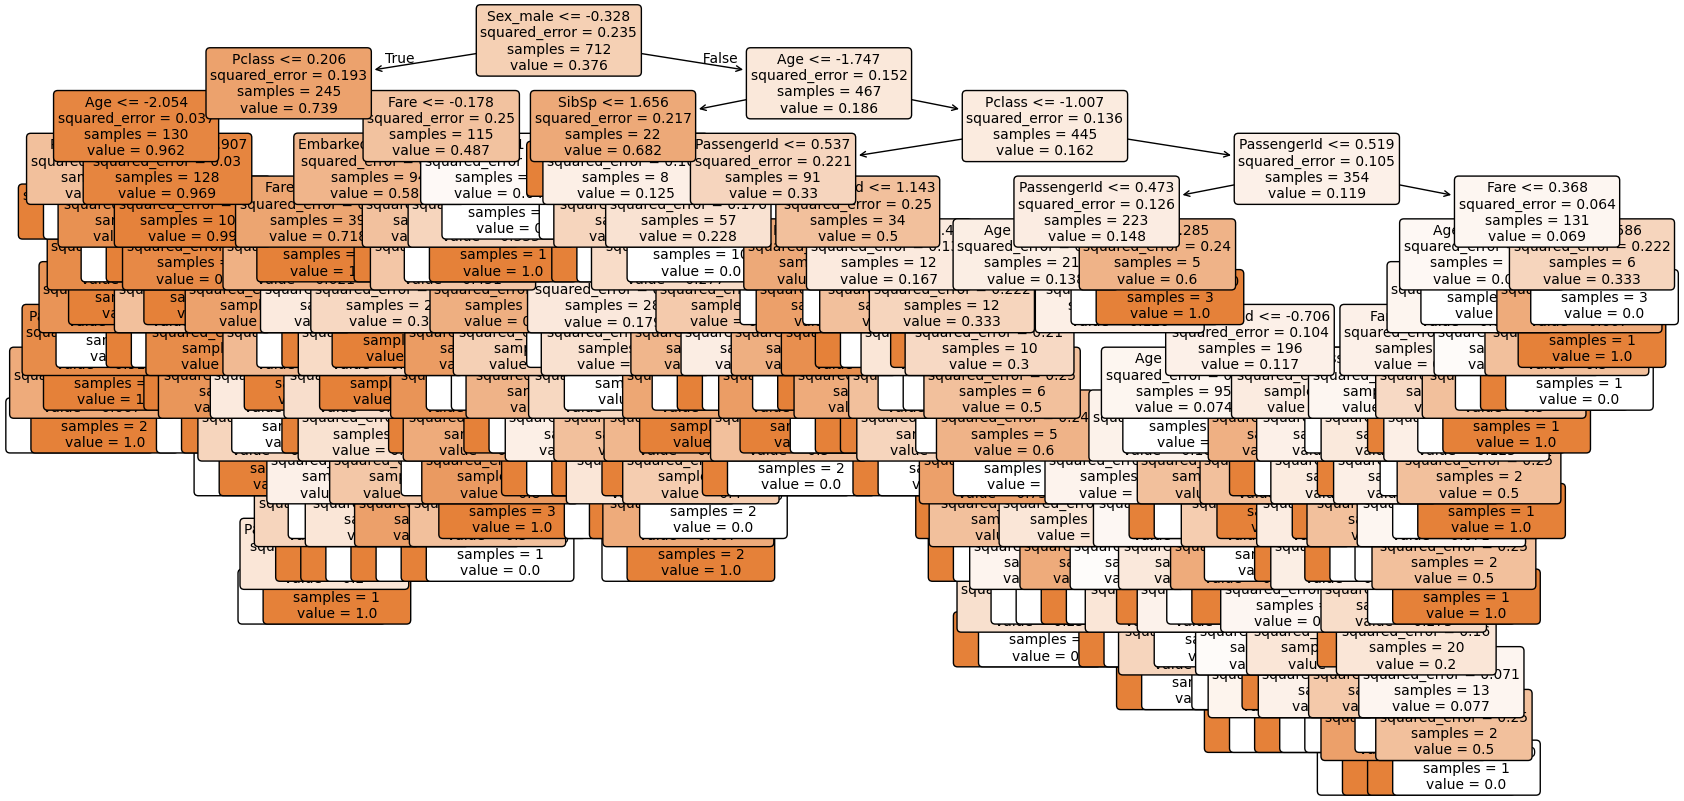

In [138]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualiza el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    model_unreg,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=['si', 'no'],
    rounded=True,
    fontsize=10
)
plt.show()

#### **3. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*


<br>

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)


{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [129]:
model_reg= DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)
model_reg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [130]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
# Realizar predicciones sobre el conjunto de test
y_pred_reg = model_reg.predict(X_test_scaled)

# Calcular métricas

print("Reporte de clasificación:\n", classification_report(y_test, y_pred_reg))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_reg))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       105
           1       0.42      1.00      0.59        74

    accuracy                           0.42       179
   macro avg       0.71      0.50      0.30       179
weighted avg       0.76      0.42      0.25       179

Matriz de confusión:
 [[  1 104]
 [  0  74]]


#### <div style="background-color:green;color:white">
1. ¿El modelo mejora en generalización?

No, el modelo regulado no mejora la generalización. Al aplicar una regularización demasiado fuerte, el modelo se volvió subajustado: prácticamente predice todo como clase 1

2. ¿Se reduce el sobreajuste?

El modelo regulado no está sobreajustado, está subajustado (underfitting): demasiado simple, incapaz de representar bien los datos.

#### **4. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable es la más determinante para sobrevivir según el árbol?

El sexo del pasajero

2. ¿Coincide con lo observado en la regresión logística (coeficiente de Sex_male)?

No coincide el número del coeficiente
<br>

In [131]:
# Importancia de las variables del dataset
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": model_reg.feature_importances_
})

# Ordenar por importancia descendente
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

print(coeficientes)

      Variable  Importancia
6     Sex_male     0.606916
1       Pclass     0.209944
2          Age     0.070145
5         Fare     0.061359
3        SibSp     0.048229
0  PassengerId     0.003407
4        Parch     0.000000
7   Embarked_Q     0.000000
8   Embarked_S     0.000000


#### **5. Visualizar el árbol**

<br>

<div style="background-color:green;color:white">

Comparar el árbol de decisión del modelo sin podar y el modelo podado.


<br>

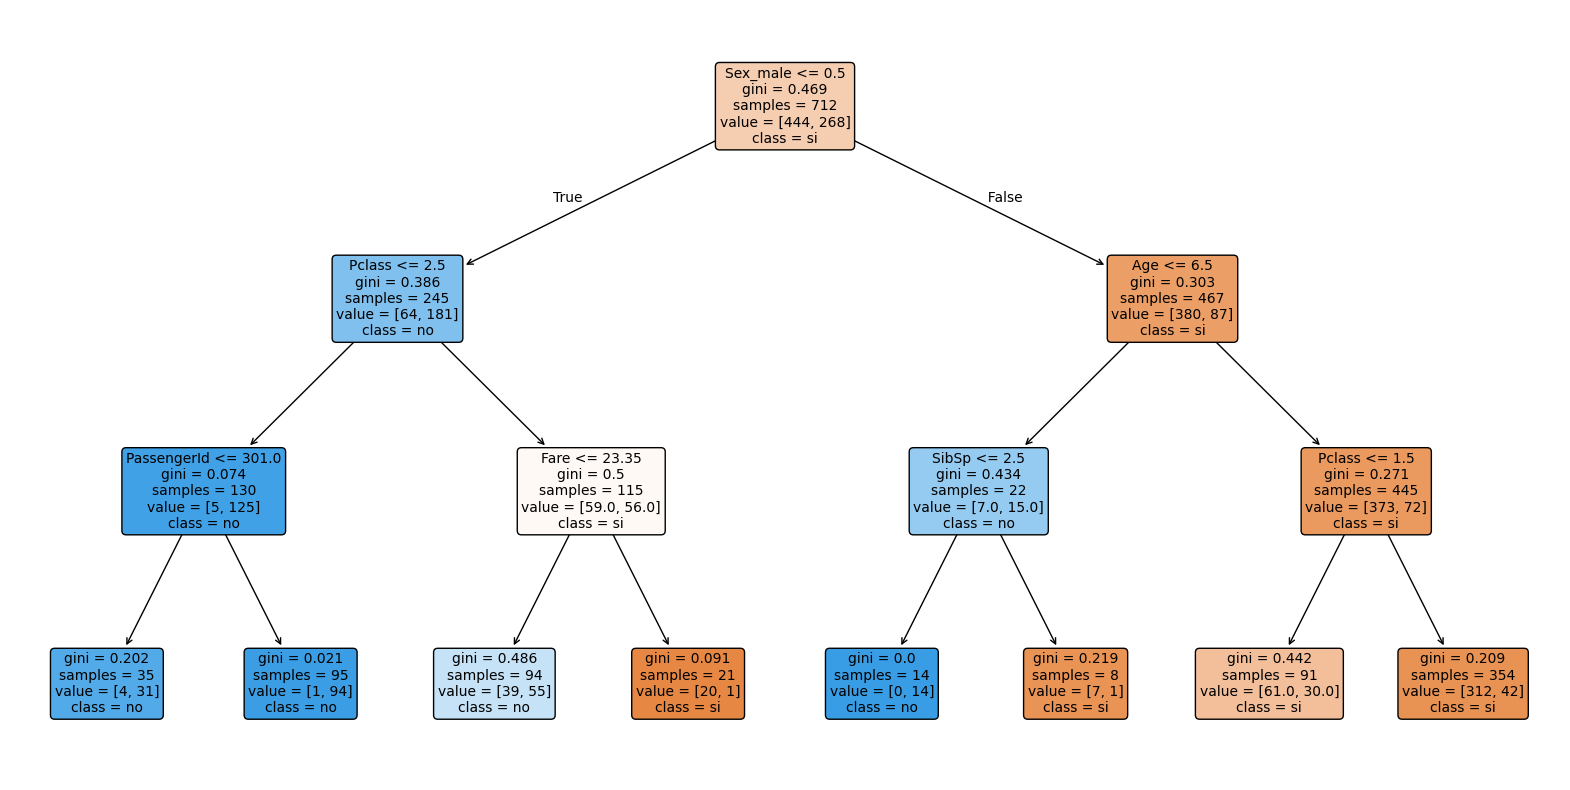

In [124]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualiza el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    model_reg,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=['si', 'no'],
    rounded=True,
    fontsize=10
)
plt.show()

#  **Ejemplo de Árboles de Decisión para Regresión**

Hasta ahora hemos visto que los **árboles de decisión** se utilizan principalmente para **clasificación**, es decir, para predecir **categorías** (por ejemplo: aprobado/suspenso, spam/no spam, enfermo/sano…).
Sin embargo, los árboles de decisión también pueden utilizarse para **regresión**, cuando lo que se desea predecir es un **valor numérico continuo**, como por ejemplo:

* El **precio de una vivienda**
* El **consumo eléctrico**
* La **nota media de un alumno**
* La **velocidad del viento**
* El **importe de una factura**

En este caso hablamos de **árboles de regresión**.

---

##  ¿Qué diferencia a un árbol de regresión de uno de clasificación?

La **estructura del árbol es casi idéntica**:

* Hay una **raíz**
* Hay **nodos intermedios**
* Hay **hojas**

La diferencia principal está en lo que ocurre en las **hojas**:

* En **clasificación**, cada hoja devuelve una **clase**
* En **regresión**, cada hoja devuelve un **valor numérico**, que suele ser:

> 🔹 **la media de los valores reales de las muestras que caen en esa hoja**

Es decir, el árbol **no inventa valores**, simplemente **promedia los datos reales que ya existen**.

## Funcionamiento del Árbol de Regresión

El árbol funciona así:

1. Toma los datos de entrenamiento.
2. Prueba todas las variables y muchos posibles cortes.
3. Divide el conjunto en dos partes.
4. Repite el proceso en cada parte.
5. Se detiene cuando:

   * Se alcanza una profundidad máxima.
   * O hay pocas muestras en un nodo.
   * O ya no se mejora la predicción.

Cuando llega a una hoja, el valor que devuelve es:

$
\hat{y} = \text{media de los valores reales de ese grupo}
$

## Función de Error: MSE (Error Cuadrático Medio)

En clasificación se usa **impureza (Gini o Entropía)**.
En regresión, el criterio de decisión es el **MSE (Mean Squared Error)**:

$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$

Donde:

* $ y_i $ es el valor real
* $ \hat{y}_i $ es el valor predicho
* $ m $ es el número de muestras

El árbol intenta hacer divisiones que **minimicen este error**.

---

## Algoritmo CART aplicado a Regresión

Scikit-learn utiliza el algoritmo **CART (Classification And Regression Tree)** tanto en clasificación como en regresión.

En regresión, el criterio de división es:

$
J(k,t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}
$

Es decir:

* Divide los datos en dos grupos.
* Calcula el error en cada grupo.
* Elige la división que produce **menor error total ponderado**.

⚠️ Este algoritmo es:

* **Greedy (avaro)** → solo busca la mejor división local.
* **No garantiza el árbol óptimo global**.
* Encontrar el árbol perfecto es un problema **NP–Completo**.

---

## Complejidad Computacional

### Predicción

La predicción consiste en recorrer el árbol desde la raíz hasta una hoja:

$
O(\log_2(m))
$

Ventaja clave:

✅ Es **muy rápida**

✅ No depende del número de variables

✅ Ideal para sistemas en tiempo real


###  Entrenamiento

El entrenamiento es más costoso:

$
O(n \cdot m \log_2(m))
$

Donde:

* ( n ) → número de características
* ( m ) → número de muestras

Por eso:

* Con pocos datos → entrenamiento rápido
* Con millones de datos → entrenamiento lento

---

## Problema Principal: Sobreajuste (Overfitting)

Los árboles de decisión **aprenden con muchísima precisión**, pero eso tiene un problema:

> Si no se limitan, **memorizan el ruido** de los datos.

Esto provoca:

* Excelente resultado en entrenamiento
* **Mal resultado en datos nuevos**

A esto lo llamamos **sobreajuste**.

##  Parámetros de Regularización

Para evitar el sobreajuste se usan estos parámetros:

| Parámetro           | Función                         |
| ------------------- | ------------------------------- |
| `max_depth`         | Limita la profundidad del árbol |
| `min_samples_leaf`  | Mínimo de muestras por hoja     |
| `min_samples_split` | Mínimo para dividir un nodo     |
| `max_leaf_nodes`    | Máximo número de hojas          |

👉 Aumentar estos valores = menos sobreajuste
👉 Disminuirlos = más riesgo de sobreajuste

## Ejemplo Práctico Interpretado

Se genera un conjunto de datos con esta forma:

$
y = (x - 0.5)^2 + \text{ruido}
$

In [65]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [66]:
# Generate noisy quadratic data
X = np.linspace(0, 1, 500)
y = (X - 0.5)**2 + np.random.randn(500) / 50.

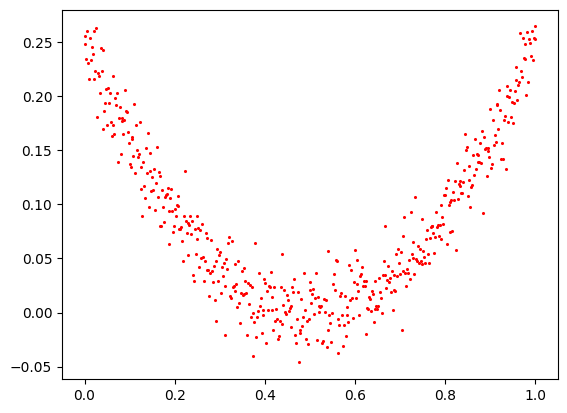

In [67]:
plt.scatter(X, y, s=1.5, c='red')


### Entrenamos un árbol con `max_depth = 2`

   ✔ Modelo simple
   
   ✔ Buena generalización

In [68]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [69]:
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

Visualización del árbol

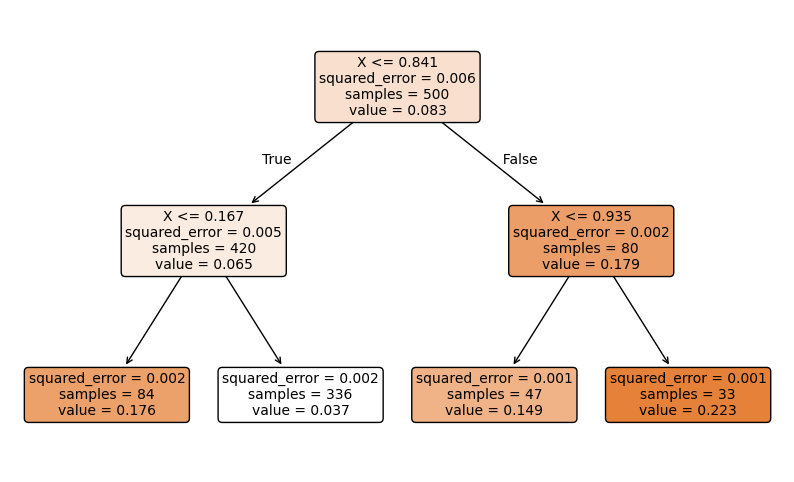

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    tree_reg,
    feature_names=['X'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


En este caso, el árbol funciona igual que en clasificación, pero cada hoja predice un **valor numérico**, correspondiente al **promedio de los valores reales** de las muestras que contiene.

---

### Predicciones


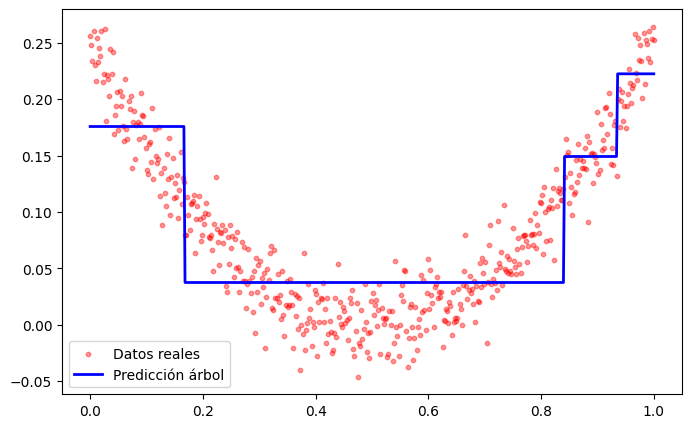

In [71]:
# Predicción sobre TODOS los puntos de X
y_pred = tree_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Entrenamos un árbol sin regularizar

❌ Memoriza el ruido

❌ Sobreajuste muy fuerte

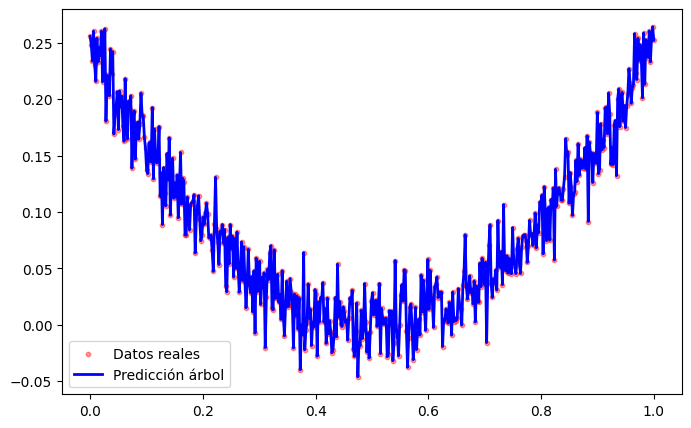

In [72]:
tree_no_reg = DecisionTreeRegressor()

tree_no_reg.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred2 = tree_no_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred2, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Árbol con min_samples_leaf = 10

✅ Modelo más estable

✅ Predicción más realista

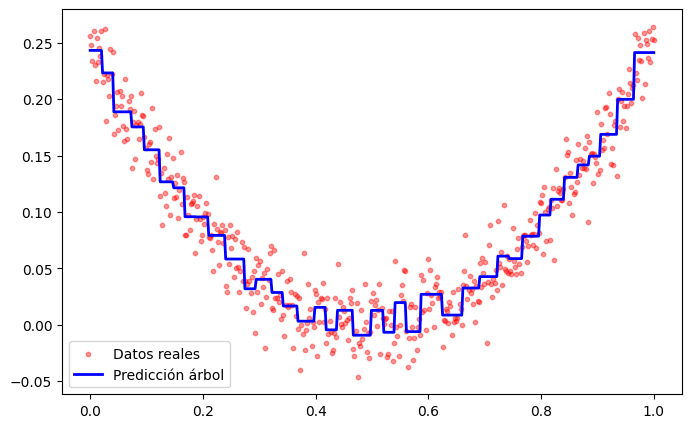

In [73]:
tree_reg_10 = DecisionTreeRegressor(min_samples_leaf=10)

tree_reg_10.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred10 = tree_reg_10.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred10, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

## **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para Regresión y compararlo con Regresión Lineal**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **modelo de Árbol de Decisión para Regresión (`DecisionTreeRegressor`)** sobre un dataset real.
* Comparar su rendimiento frente al modelo de **Regresión Lineal**.
* Identificar posibles casos de **sobreajuste (overfitting)**.
* Aplicar **regularización** en árboles de regresión.
* Interpretar la **importancia de las variables** en un modelo basado en árboles.

El alumnado trabajará con el **dataset del seguro médico**, ya utilizado previamente para Regresión Lineal:

* **insurance.csv** (coste de seguros médicos)

La variable objetivo es:

* **`charges` → coste anual del seguro**

### **PARTE 1 – Árbol de Decisión aplicado al dataset del Seguro Médico**



Implementamos el mismo flujo del notebook (carga → limpieza → transformación → división)



In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

df = pd.read_csv('data/insurance.csv')

##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### **1. Crear el modelo de Árbol de Decisión básico**

<div style="background-color:green;color:white">

<br>

* Crea un modelo inicial sin regularizar:

<br>

<div style="background-color:green;color:white">

<br>

* Entrena el modelo con los datos de entrenamiento (*X_train*, *y_train*).
* Realiza predicciones sobre el conjunto de test.

<br>

In [141]:
from sklearn.tree import DecisionTreeRegressor
# Crear y entrenar modelo
model_unreg = DecisionTreeRegressor(random_state=42)
model_unreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

---

In [142]:
# Realiza predicciones sobre el conjunto de test
y_pred_unreg = model_unreg.predict(X_test)

#### **2. Evaluar el rendimiento del modelo**

<div style="background-color:green;color:white">

<br>

Calcula las siguientes métricas sobre el conjunto de test:

* **MAE**
* **MSE**
* **RMSE**
* **R²**

<br>

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calcular métricas
mae_unreg = mean_absolute_error(y_test, y_pred_unreg)
mse_unreg = mean_squared_error(y_test, y_pred_unreg)
rmse_unreg = np.sqrt(mse_unreg)
r2_unreg = r2_score(y_test, y_pred_unreg)

print(f"MAE: {mae_unreg:.2f}")
print(f"MSE: {mse_unreg:.2f}")
print(f"RMSE: {rmse_unreg:.2f}")
print(f"R²: {r2_unreg:.2f}")

MAE: 747.81
MSE: 10901770.31
RMSE: 3301.78
R²: 0.93


<div style="background-color:green;color:white">

<br>

Representa en un gráfico:

* *y_test* frente a *y_pred*

Guarda los valores obtenidos para compararlos más adelante con los otros modelos.


<br>

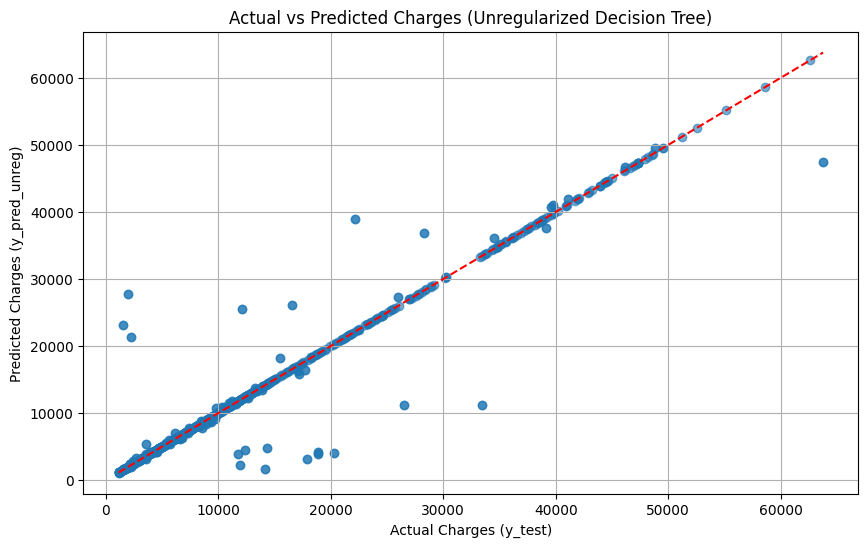

In [147]:
# Representar en un gráfico y_test frente a y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_unreg, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges (y_test)')
plt.ylabel('Predicted Charges (y_pred_unreg)')
plt.title('Actual vs Predicted Charges (Unregularized Decision Tree)')
plt.grid(True)
plt.show()

#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

<br>

Compara:

* El rendimiento del árbol en **entrenamiento**
* El rendimiento en **test**


<br>

In [148]:

r2_train_unreg = model_unreg.score(X_train, y_train)

print(f"R² (entrenamiento): {r2_train_unreg:.2f}")
print(f"R² (test): {r2_unreg:.2f}")

R² (entrenamiento): 1.00
R² (test): 0.93


<div style="background-color:green;color:white">

<br>

Responde:

* ¿Existe una diferencia grande entre ambos resultados?

No

* ¿Indica esto un posible sobreajuste?

Si porque en el entrenamiento es perfecto y en el test baja

* ¿Por qué los árboles tienden a sobreajustar con facilidad?

Los árboles tienden a sobreajustar porque son muy flexibles y pueden memorizar los datos si no se limitan.

<br>

#### **4. Aplicar regularización al Árbol de Decisión**

<div style="background-color:green;color:white">

<br>
Entrena nuevos modelos **modificando hiperparámetros de regularización**, por ejemplo:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar **GridSearchCV** para probar varias combinaciones y seleccionar la mejor.

<br>

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

model = DecisionTreeRegressor()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [152]:
model_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10, random_state=42)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10,
                      random_state=42)

<div style="background-color:green;color:white">

<br>

Comparar el rendimiento entre:

* Árbol **sin regularización**
* Árbol **regularizado**


<br>

In [153]:

# Comprobar rendimiento del árbol sin regularización
print("Train accuracy (sin regularización):", model_unreg.score(X_train, y_train))
print("Test accuracy (sin regularización):", model_unreg.score(X_test, y_test))

# Comprobar rendimiento del árbol regularizado
print("Train accuracy (regularizado):", round(model_reg.score(X_train, y_train),4))
print("Test accuracy (regularizado):", round(model_reg.score(X_test, y_test),4))

Train accuracy (sin regularización): 1.0
Test accuracy (sin regularización): 0.9303261397885474
Train accuracy (regularizado): 0.8836
Test accuracy (regularizado): 0.8557


<div style="background-color:green;color:white">

<br>


* ¿Disminuye el sobreajuste?

La regularización disminuye el sobreajuste.

* ¿Qué ocurre con el valor de R²?

El valor de R² baja en ambos conjuntos.

* ¿Cuál de los dos modelos generaliza mejor?

El modelo regularizado generaliza mejor, aunque con menor precisión absoluta, pero con menos sobreajuste.

<br>